## PROJECT DONE BY :

### (1) Reuben Haruray ( 0865360)
### (2) Kartik Bhardwaj (0694079)



# Synopsis of the project.


###  So I 'll be recording the signal using my 'quick time player ' in mac . Then I  am changing the extension of the file to '.bin', so that I can plot it  using the plot function from the matplot lib.. Then I will be taking the DFT of the signal. Then I will be using a  lowpass butterworth filter and I will be ploting its magnitude and phase response . Then the speech plot will be filtered by butterwoth and chebyshev filters and the results will be compared.

Chebyshev filters are nothing but analog or digital filters. These filters have a steeper roll off &amp; type-1
filter (more pass band ripple) or type-2 filter (stop band ripple) than Butterworth filters. The property of
this filter is, it reduces the error between the characteristic of the actual and idealized filter. Because,
inherent of the pass band ripple in this filter. Chebyshev filters are used for distinct frequencies of one
band from another. They cannot match the windows-sink filter’s performance and they are suitable for
many applications. The main feature of Chebyshev filter is their speed, normally faster than the
windowed-sinc. Because these filters are carried out by recursion rather than convolution. The designing
of the Chebyshev and Windowed-Sinc filters depends on a mathematical technique called as the Z-
transform. The Butterworth filter is a type of signal processing filter designed to have as flat a frequency
response as possible in the passband. It is also referred to as a maximally flat magnitude filter.
#### The difference between Chebyshev and Digital filters are: -
Magnitude response vs frequency curve: The magnitude response of the Butterworth filter decreases
with increase in frequency from 0 to infinity, while the magnitude response of the Chebyshev filter
fluctuates or show ripples in the passband and stopband depending on the type of the filter.
Width of Transition band: The width of the transition band is more in Butterworth filter compared to
the Chebyshev filter.
Location of the poles: The poles of a Butterworth filter lies only on a circle while that of the Chebyshev
filter lies on an ellipse, which can be easily concluded on looking at the poles formula for both types of
filters.

In [172]:
# We are importing the function playsound from the module playsound.

 #We can listen to the Recorder(unfiltered) speech by running the code below and providing the path  of the file.

from playsound import playsound
f=playsound('My_name.wav')



# Using data type ' float32 '

53578

 The length of the array is :53578


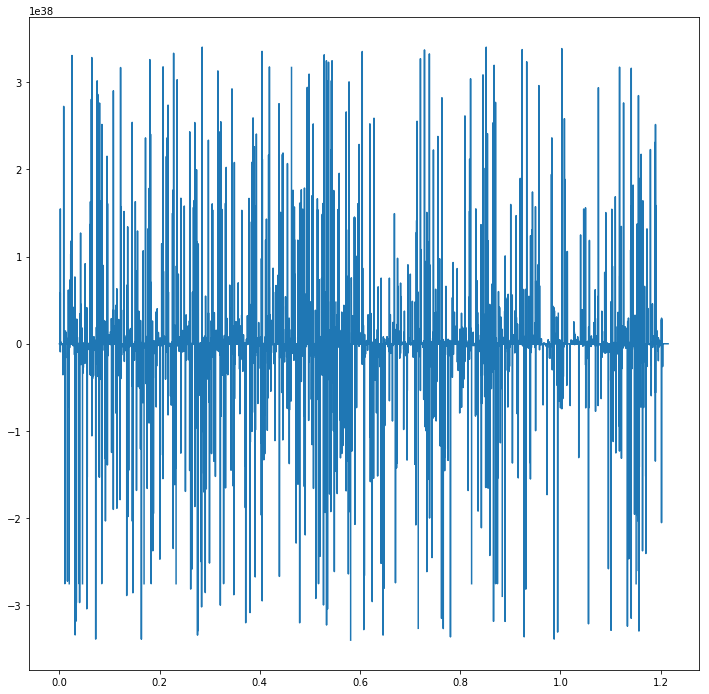

In [286]:
# Now I am changing my speech signal to bin file and making an array of the data

import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import pylab as pl

p=open('My_name.bin','rb')

Signal= np.fromfile(p,count=-1,dtype=np.float32)

print(len(Signal))
Q = len(Signal)

print('\n The length of the array is :' + str(len(Signal)))

x=np.arange(0,Q/44100,1/44100)
plt.figure(figsize=(12,12))
plt.plot(x,Signal[:L])





## Using this data type 'float32' is giving a plot as shown but the values if I print are of the order e-36 and fluctuating.
## That is why in the next plot I am using the data type 'unit32' as its raw values can be used to plot the DFT and filtering.

53578

 The length of the array is :53578


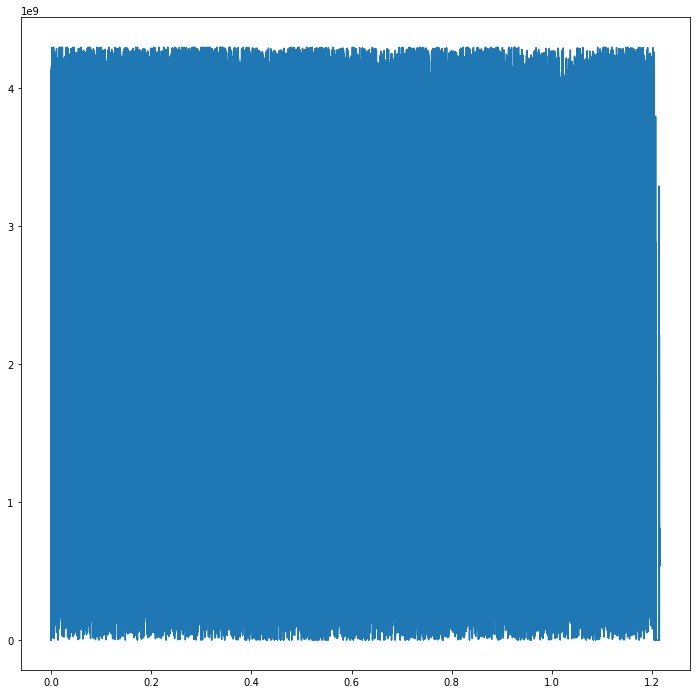

In [269]:
# Now I am changing my speech signal to dat file and making an array of the data

import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import pylab as pl

f=open('My_name.bin','rb')

Signal= np.fromfile(f,count=-1,dtype=np.uint32)

print(len(Signal))
L = len(Signal)

print('\n The length of the array is :' + str(len(Signal)))

x=np.arange(0,L/44100,1/44100)
plt.figure(figsize=(12,12))
plt.plot(x,Signal[:L])



## Taking the DFT of the acquired signal ( using the dat from data type 'uint32')

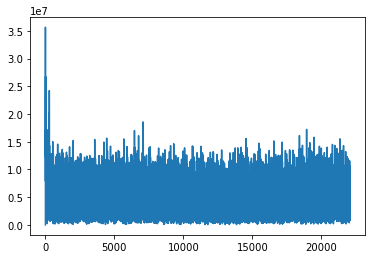

In [271]:
dataF=Signal-np.mean(Signal) # eliminating DC.
Y=np.fft.fft(dataF)
L=len(dataF)
Filtered_but=abs(Y)/L
f = np.arange(0,44100/2,44100/53578)
plt.plot(f,Filtered_but[0:26789])


# Designing the filters

(-180, 0)

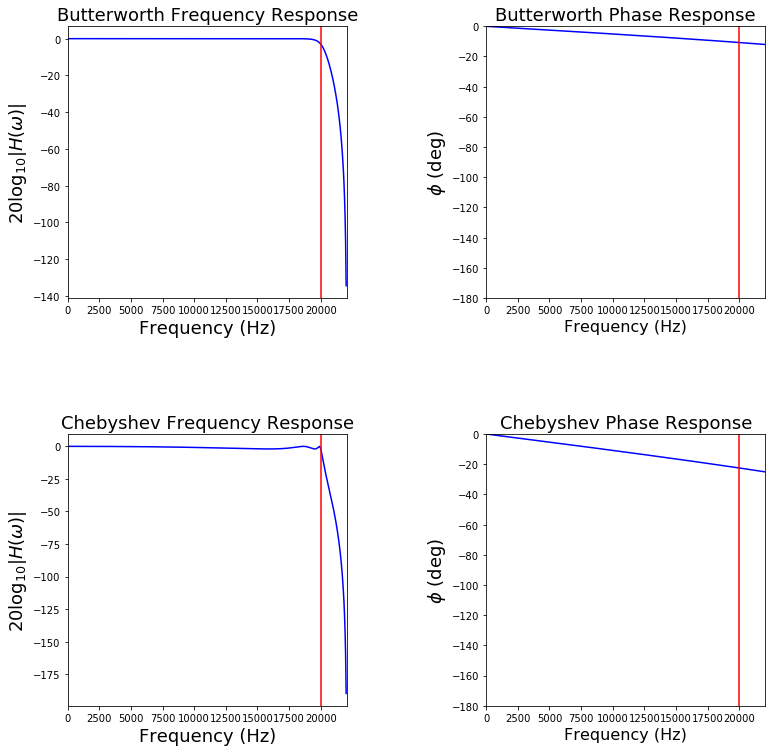

In [298]:
from matplotlib import gridspec
from scipy import signal
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))


fig=plt.figure()
fig.set_size_inches((20,20))
gs = gridspec.GridSpec(3,3)
gs.update( wspace=0.5, hspace=0.5)
ax = fig.add_subplot(plt.subplot(gs[0,0]))




# Define Normalized Cutoff Frequency for Digital Filter
fs = 44100    # sampling frequency that I am using to filter my speech signal
nyq = 0.5 * fs    # Nyquist Frequency
cuthigh = 20000  # setting the cutoff frequency
normal_cuthigh = cuthigh / nyq

order = 4
b, a = signal.butter(order,normal_cuthigh, btype='low', analog=False)
w, h = signal.freqz(b, a)

# designing the butterworth filter
ax = fig.add_subplot(plt.subplot(gs[0,0]))
plt.plot(0.5*fs*w/np.pi, 20*np.log10(abs(h)), 'b')
plt.axvline(cuthigh, color='r')
plt.xlim(0, 0.5*fs)
plt.title('Butterworth Frequency Response',fontsize=18)
plt.xlabel('Frequency (Hz)',fontsize=18)
plt.ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)



#phase response of butterworth
ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(0.5*fs*w,np.angle(h)/np.pi*180,'b')
plt.title('Butterworth Phase Response',fontsize=18)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel(r"$\phi $ (deg)",fontsize=18)
plt.xlim(0, 0.5*fs)
plt.axvline(cuthigh, color='r')
plt.ylim(ymin=-180,ymax=0)


# order is 4,ripple permissible is 2, high cut is 20000
b, a = signal.cheby1(5,rp=2,Wn=normal_cuthigh, btype='low', analog=False)
w, h = signal.freqz(b, a)

#magnitude of the chebyshev filter that is used.
ax = fig.add_subplot(plt.subplot(gs[1,0]))
plt.plot(0.5*fs*w/np.pi, 20*np.log10(abs(h)), 'b')
plt.legend(loc='upper right')
plt.axvline(cuthigh, color='r')
plt.xlim(0, 0.5*fs)
plt.title('Chebyshev Frequency Response',fontsize=18)
plt.xlabel('Frequency (Hz)',fontsize=18)
plt.ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)


# phase response of chebyshev
ax = fig.add_subplot(plt.subplot(gs[1,1]))
plt.plot(0.5*fs*w,np.angle(h)/np.pi*180,'b')
plt.title('Chebyshev Phase Response',fontsize=18)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel(r"$\phi $ (deg)",fontsize=18)
plt.xlim(0, 0.5*fs)
plt.axvline(cuthigh, color='r')
plt.ylim(ymin=-180,ymax=0)


# Filtering the Speech signal using Butterworth and chebyshev and compairing the results.

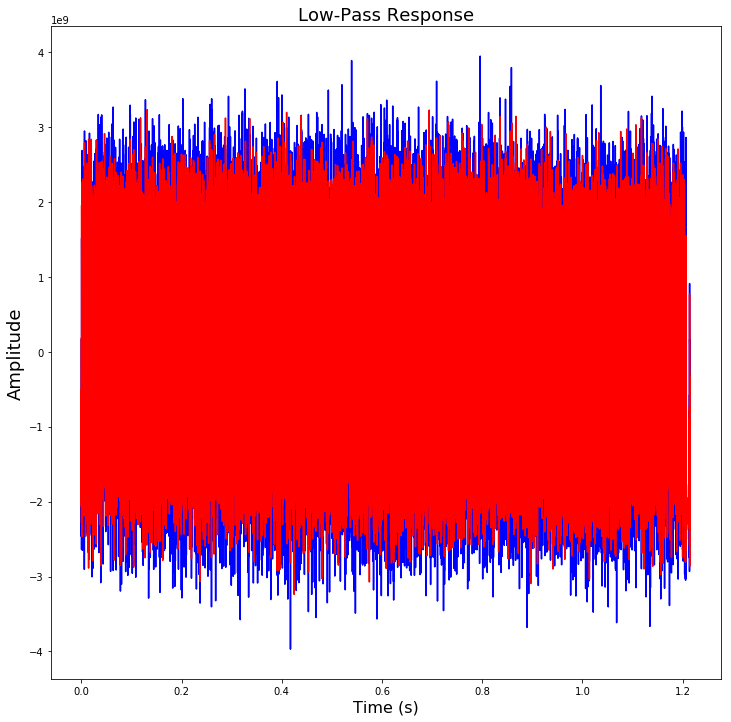

In [282]:


input_sig = Signal[0:53578]-np.mean(Signal[0:53578]) # removing DC again.


b, a = signal.butter(order, normal_cuthigh, btype='low', analog=False)
d, c = signal.cheby1(5,rp=3,Wn=normal_cuthigh, btype='low', analog=False)



plt.figure(figsize=(12,12))
plt.title('Low-Pass Response',fontsize=18)
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Amplitude',fontsize=18)


# Filtering the signal using the butterworth filter 
filtered_signal_butter = signal.lfilter(b,a,input_sig)
plt.plot(x,filtered_signal_butter,'b',label='Butterworth')
 
# Filtering the Signal using the chebyshev filter 
filtered_signal_cheby = signal.lfilter(d,c,input_sig)
plt.plot(x,filtered_signal_cheby,'r',label='Chebyshev')




## As we can see from the plots of the  filtered speech signal . We witness that the filtering of chebyshev filter is more close to the desired filtering curve. Since we know the Signal to noise ratio of the chebyshev is better than the SNR of the butterworth , this result for expected. 


# I did the same project on Matlab and the results are as follows.

# Noisy Speech signal

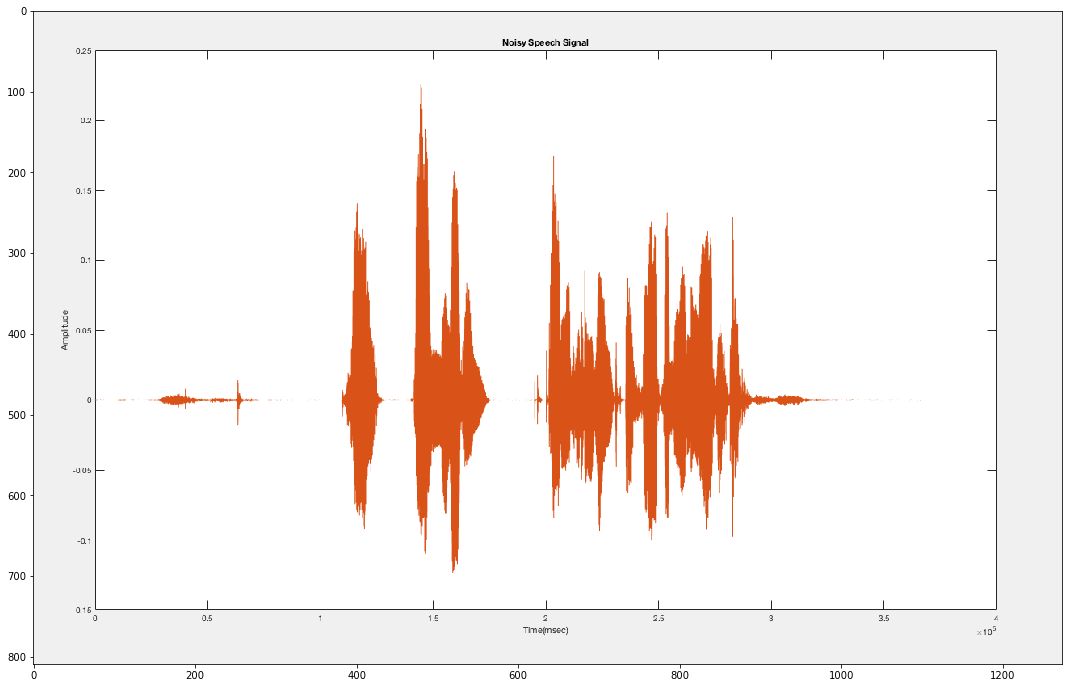

In [293]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


brainpic = novice.open('NOISY_SPEECH.png')
plt.figure(figsize=(15,15))
brainpic.show()

# Filtered Signal using Butterworth


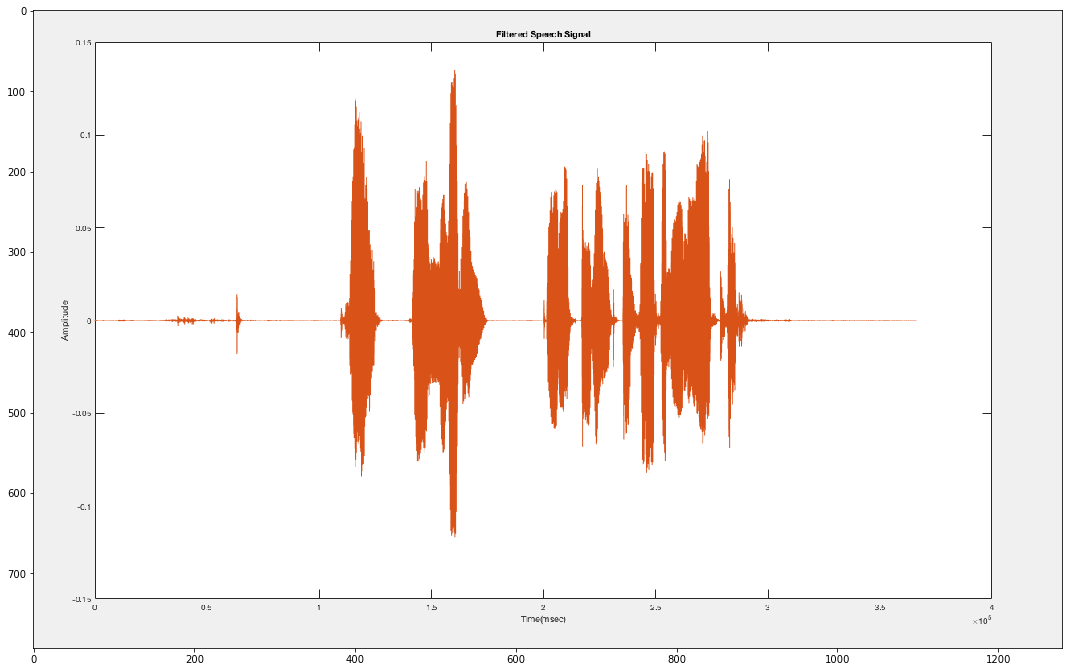

In [295]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


brainpic = novice.open('FILTER_BUTTER.png')
plt.figure(figsize=(15,15))
brainpic.show()

# Filtered Signal using Chebyshev Filter.

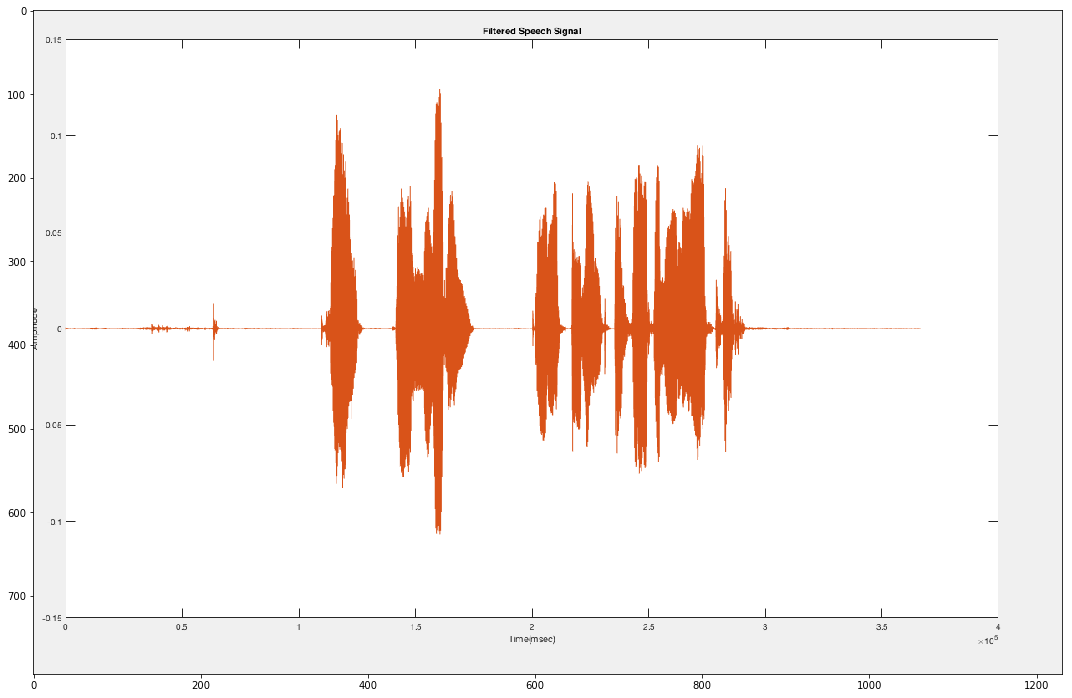

In [296]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


brainpic = novice.open('FILTER_CHEBY.png')
plt.figure(figsize=(15,15))
brainpic.show()

# References:

##### [1]   $Signal$ $Processing$.Dr. Laura Curiel. Lakehead University, University Lecture. 2017.

##### [2] Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).

##### [3] Digital Filters By Richard W. Hamming.

##### [4] 
Budak, A. and Aronhime, P., 1971. Transitional butterworth-chebyshev filters. IEEE Transactions on Circuit Theory, 18(3), pp.413-415.

##### [5]
Novel Speech Signal Processing Algorithms for
High-Accuracy Classification of Parkinson’s Disease
Athanasios Tsanas*, Max A. Little, Patrick E. McSharry, Senior Member, IEEE, Jennifer Spielman,

and Lorraine O. Ramig

##### [6]
Research on Speech Signal Processing Practical



Yang Yi

Department of Electronic Engineering
Tsinghua University

Deng Beixing
Department of Electronic Engineering
Tsinghua University

Ma Xiaohong
Department of Electronic Engineering
Tsinghua University
Beijing, China 100084 Beijing, China 100084 Beijing, China 100084
Email: yangyy@mail.tsinghua.edu.cn Email: dengbx@mail.tsinghua.edu.cn Fax: (+86) 010-6277-0317


##### [7] 
Speech Signal Processing in Order to Increase Recognition of Spoken Language

Heiiryk R. Hulas

lnstytut Automatyki i Robotyki Politcchniki Warsxawskicj, Chodkiewicia 8, Warszawa,

(halas @mp.pw.edu.pl)


